In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [385]:
train=pd.read_csv("train.csv",encoding='latin1')
test=pd.read_csv("test.csv",encoding='latin1')
solution=pd.read_csv("solution.csv")

In [386]:
solution.head()

,x1,y
0,60001,9800
1,60002,2500
2,60003,17999
3,60004,7550
4,60005,2500


In [387]:
#x1	VehicleID
#x2	DataCollectedDate
#x3	NameOfTheVehicle
#x4	SellerType
#x5	OfferType
#y	Price
#x6	VehicleType
#x7	YearOfVehicleRegistration
#x8	GearBoxType
#x9	PowerOfTheEngine
#x10	ModelOfTheVehicle
#x11	DistranceTravelled
#x12	MonthOfVehicleRegistration
#x13	TypeOfTheFuelUsed
#x14	BrandOfTheVehicle
#x15	IsDamageRepaired
#x16	DateOfAdCreation
#x17	NumberOfPictures
#x18	ZipCode
#x19	DateOfAdLastSeen


In [388]:
train.columns


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'y', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19'],
      dtype='object')

In [389]:
test.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19'],
      dtype='object')

In [390]:
train.columns.difference(test.columns)

Index(['y'], dtype='object')

In [391]:
print("train size:",train.shape)
print("test size:",test.shape)

train size: (58857, 20)
test size: (19609, 19)


In [392]:
train["source"]=0
test["source"]=1

In [393]:
dataf=pd.concat([train,test],axis=0,sort=False)

In [394]:
dataf.shape

(78466, 21)

In [395]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78466 entries, 0 to 19608
Data columns (total 21 columns):
x1        78466 non-null int64
x2        78466 non-null object
x3        78466 non-null object
x4        78466 non-null object
x5        78466 non-null object
y         58857 non-null float64
x6        75986 non-null object
x7        78466 non-null int64
x8        76242 non-null object
x9        78466 non-null int64
x10       78466 non-null object
x11       78466 non-null float64
x12       78466 non-null int64
x13       75627 non-null object
x14       78466 non-null object
x15       69368 non-null object
x16       78466 non-null object
x17       78466 non-null int64
x18       78466 non-null int64
x19       78466 non-null object
source    78466 non-null int64
dtypes: float64(2), int64(7), object(12)
memory usage: 13.2+ MB


In [396]:
dataf.describe()

,x1,y,x7,x9,x11,x12,x17,x18,source
count,78466.000000,58857.000000,78466.000000,78466.000000,78466.000000,78466.000000,78466.0,78466.000000,78466.000000
mean,39519.140749,7638.980971,2006.285066,129.894553,120115.910076,6.176854,0.0,51912.579984,0.249904
std,23024.762905,6710.787043,4.026041,162.924303,41245.291086,3.522743,0.0,25632.180866,0.432960
min,1.000000,1001.000000,2000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,0.000000
25%,19617.250000,2850.000000,2003.000000,86.000000,90000.000000,3.000000,0.0,31675.000000,0.000000
50%,39233.500000,5400.000000,2006.000000,122.000000,150000.000000,6.000000,0.0,51065.000000,0.000000
75%,58849.750000,9999.000000,2009.000000,163.000000,150000.000000,9.000000,0.0,72622.000000,0.000000
max,79609.000000,39800.000000,2016.000000,19211.000000,150000.000000,12.000000,0.0,99998.000000,1.000000


In [397]:
dataf.isna().sum()

x1            0
x2            0
x3            0
x4            0
x5            0
y         19609
x6         2480
x7            0
x8         2224
x9            0
x10           0
x11           0
x12           0
x13        2839
x14           0
x15        9098
x16           0
x17           0
x18           0
x19           0
source        0
dtype: int64

In [398]:
dataf.nunique()

x1        78466
x2        12880
x3        52600
x4            1
x5            1
y          2358
x6            8
x7           17
x8            2
x9          437
x10         235
x11          13
x12          13
x13           7
x14          38
x15           2
x16          80
x17           1
x18        7419
x19       11941
source        2
dtype: int64

In [171]:
import pandas_profiling

In [25]:
pandas_profiling.ProfileReport(dataf)

Number of variables,22
Number of observations,78466
Total Missing (%),2.1%
Total size in memory,13.2 MiB
Average record size in memory,176.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [399]:
dataf.x4.value_counts(),dataf.x5.value_counts(),dataf.x17.value_counts()

(private    78466
 Name: x4, dtype: int64, offer    78466
 Name: x5, dtype: int64, 0    78466
 Name: x17, dtype: int64)

In [400]:
dataf.drop(['x4','x5','x17'],axis=1,inplace=True)

In [401]:
def applymode(x):
        a=x.mode()[0]
        print(a)
        return x.fillna(a)

In [402]:
dataf.x6.fillna(dataf.x6.mode()[0], inplace=True)


In [403]:
dataf.x8.fillna(dataf.x8.mode()[0], inplace=True)

In [404]:
dataf.x13.fillna(dataf.x13.mode()[0], inplace=True)

In [405]:
dataf.x15.value_counts()

No     64993
Yes     4375
Name: x15, dtype: int64

In [406]:
dataf["x15"]= dataf["x15"].fillna('No')

EDA

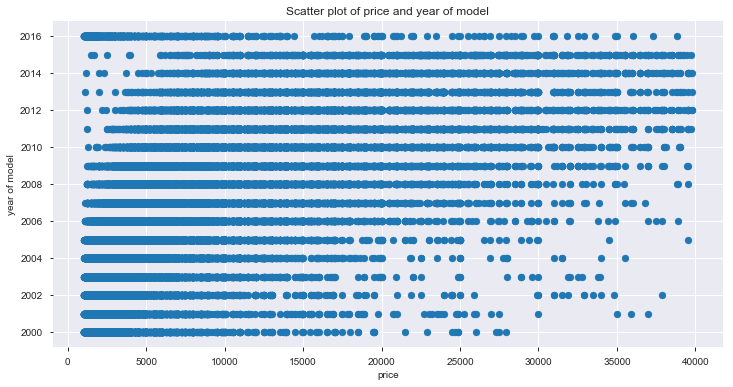

In [407]:
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.scatter(dataf.y, dataf.x7)
plt.xlabel("price", fontsize=10)
plt.ylabel("year of model", fontsize=10)
plt.title("Scatter plot of price and year of model",fontsize=12)
plt.show()

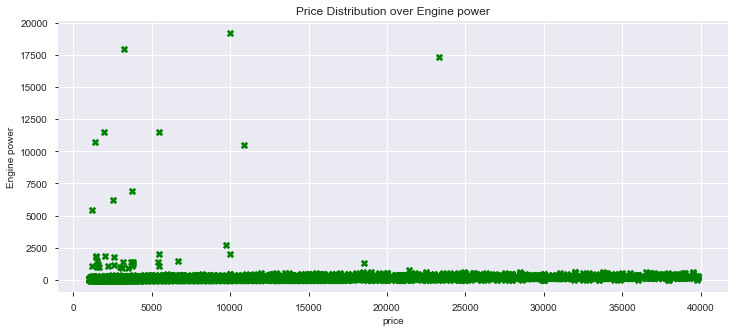

In [408]:
%matplotlib inline
plt.figure(figsize=(12, 5))
plt.scatter(dataf.y, dataf.x9,c='Green',marker='X')
plt.xlabel("price", fontsize=10)
plt.ylabel("Engine power", fontsize=10)
plt.title("Price Distribution over Engine power",fontsize=12)
plt.show()

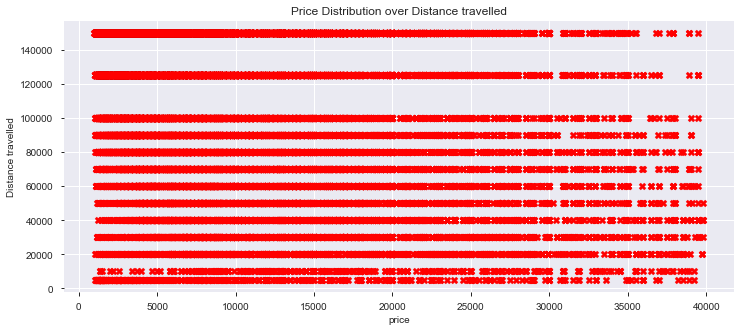

In [409]:
%matplotlib inline
plt.figure(figsize=(12, 5))
plt.scatter(dataf.y, dataf.x11,c='Red',marker='X')
plt.xlabel("price", fontsize=10)
plt.ylabel("Distance travelled", fontsize=10)
plt.title("Price Distribution over Distance travelled",fontsize=12)
plt.show()

In [410]:
dataf.head()

,x1,x2,x3,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x18,x19,source
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,3850.0,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,34474,07/04/16 13:15,0
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,5999.0,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,50765,11/03/16 17:15,0
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,5990.0,limousine,2007,automatic,150,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,90475,26/03/16 17:38,0
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,4000.0,limousine,2005,manual,150,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,40699,12/03/16 2:45,0
4,5,17/03/16 17:49,Audi_A4,12950.0,Combi,2005,manual,200,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,84347,07/04/16 4:17,0


In [411]:
 dataf.x15= dataf.x15.replace({'No':0,'Yes':1})

In [412]:
dataf.x8.value_counts()

manual       58898
automatic    19568
Name: x8, dtype: int64

In [413]:
 dataf.x8= dataf.x8.replace({'manual':0,'automatic':1})

In [414]:
dataf.shape

(78466, 18)

In [415]:
dataf.drop(['x2','x16','x19'],axis=1,inplace=True)

In [416]:
import datetime

In [417]:
dataf.x12=dataf.x12.replace({0:1})

In [418]:
dataf=dataf.assign(RegDate=pd.to_datetime(dataf.x7.astype(str)+dataf.x12.astype(str)+'01',format="%Y%m%d"))

In [419]:
now=datetime.datetime.now()
dataf['Regdelta'] =now - dataf['RegDate']
dataf['Regdelta']=dataf['Regdelta'].astype('timedelta64[D]').astype(int)
      
#dataf['Regdelta']=dataf['Regdelta'].days

In [420]:
dataf.head()

,x1,x3,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x18,source,RegDate,Regdelta
0,1,Subaru_G3X_Justy_1.3,3850.0,Small Car,2004,0,94,Other,50000.0,7,petrol,subaru,0,34474,0,2004-07-01,5265
1,2,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,5999.0,Combi,2007,0,140,passat,150000.0,5,diesel,volkswagen,0,50765,0,2007-05-01,4231
2,3,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,5990.0,limousine,2007,1,150,c_klasse,150000.0,2,diesel,mercedes_benz,0,90475,0,2007-02-01,4320
3,4,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,4000.0,limousine,2005,0,150,147,150000.0,9,diesel,alfa_romeo,0,40699,0,2005-09-01,4838
4,5,Audi_A4,12950.0,Combi,2005,0,200,a4,125000.0,3,petrol,audi,0,84347,0,2005-03-01,5022


In [421]:
dataf.drop(['RegDate','x3','x10'],axis=1,inplace=True)

In [422]:
data_column_category=dataf.select_dtypes(exclude=[np.number]).columns

In [423]:
data_column_integer=dataf.columns.difference(data_column_category)

In [424]:
data_column_category

Index(['x6', 'x13', 'x14'], dtype='object')

In [425]:
dataf[data_column_category].nunique()

x6      8
x13     7
x14    38
dtype: int64

In [426]:
dataf[data_column_integer].nunique()

Regdelta      187
source          2
x1          78466
x11            13
x12            12
x15             2
x18          7419
x7             17
x8              2
x9            437
y            2358
dtype: int64

In [427]:
dataf_one_hot = pd.get_dummies(dataf[data_column_category])

In [428]:
data_model = pd.concat([dataf[data_column_integer],dataf_one_hot],axis=1)

In [429]:
data_model.shape

(78466, 64)

In [430]:
data_model.columns

Index(['Regdelta', 'source', 'x1', 'x11', 'x12', 'x15', 'x18', 'x7', 'x8',
       'x9', 'y', 'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_bus',
       'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv', 'x13_cng',
       'x13_diesel', 'x13_electro', 'x13_hybrid', 'x13_lpg', 'x13_other',
       'x13_petrol', 'x14_alfa_romeo', 'x14_audi', 'x14_bmw', 'x14_chevrolet',
       'x14_chrysler', 'x14_citroen', 'x14_dacia', 'x14_daewoo',
       'x14_daihatsu', 'x14_fiat', 'x14_ford', 'x14_honda', 'x14_hyundai',
       'x14_jaguar', 'x14_jeep', 'x14_kia', 'x14_lada', 'x14_lancia',
       'x14_land_rover', 'x14_mazda', 'x14_mercedes_benz', 'x14_mini',
       'x14_mitsubishi', 'x14_nissan', 'x14_opel', 'x14_peugeot',
       'x14_porsche', 'x14_renault', 'x14_rover', 'x14_saab', 'x14_seat',
       'x14_skoda', 'x14_smart', 'x14_subaru', 'x14_suzuki', 'x14_toyota',
       'x14_volkswagen', 'x14_volvo'],
      dtype='object')

In [431]:
train_modified = data_model.loc[data_model.source==0,:]

In [432]:
test_modified = data_model.loc[data_model.source==1,:]

In [433]:
test_modified.shape

(19609, 64)

In [434]:
train_modified.shape

(58857, 64)

In [435]:
test_modified.columns

Index(['Regdelta', 'source', 'x1', 'x11', 'x12', 'x15', 'x18', 'x7', 'x8',
       'x9', 'y', 'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_bus',
       'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv', 'x13_cng',
       'x13_diesel', 'x13_electro', 'x13_hybrid', 'x13_lpg', 'x13_other',
       'x13_petrol', 'x14_alfa_romeo', 'x14_audi', 'x14_bmw', 'x14_chevrolet',
       'x14_chrysler', 'x14_citroen', 'x14_dacia', 'x14_daewoo',
       'x14_daihatsu', 'x14_fiat', 'x14_ford', 'x14_honda', 'x14_hyundai',
       'x14_jaguar', 'x14_jeep', 'x14_kia', 'x14_lada', 'x14_lancia',
       'x14_land_rover', 'x14_mazda', 'x14_mercedes_benz', 'x14_mini',
       'x14_mitsubishi', 'x14_nissan', 'x14_opel', 'x14_peugeot',
       'x14_porsche', 'x14_renault', 'x14_rover', 'x14_saab', 'x14_seat',
       'x14_skoda', 'x14_smart', 'x14_subaru', 'x14_suzuki', 'x14_toyota',
       'x14_volkswagen', 'x14_volvo'],
      dtype='object')

In [436]:
test_modified.drop(columns=['source'],inplace=True)

In [437]:
train_modified.drop(columns=['source'],inplace=True)

In [438]:
train_modified.to_csv("train_ready_for_model.csv",index=False)

In [439]:
test_modified.to_csv("test_ready_for_model.csv",index=False)